In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel, LdaSeqModel
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from konlpy.tag import Okt

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print(len(newsgroups_train.data))

3219


In [3]:
def my_tokenizer(doc):
    tokens = RegexpTokenizer(r"[\w']+").tokenize(doc)
    return [WordNetLemmatizer().lemmatize(token) for token in tokens if len(token) > 1]

In [4]:
cv = CountVectorizer(tokenizer=my_tokenizer, max_features=2000, min_df=3, max_df=0.5, stop_words='english')
review_cv = cv.fit_transform(newsgroups_train.data)
review_cv.shape

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


(3219, 2000)

In [5]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', n_jobs=-1, random_state=0)
review_topics = lda.fit_transform(review_cv)
review_topics.shape

(3219, 10)

In [7]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: {', '.join([feature_names[i] for i in topic.argsort()[:-(n_top_words+1):-1]])}")
    print()

In [9]:
print_top_words(lda, cv.get_feature_names_out())

Topic #0: space, nasa, wa, gov, year, launch, orbit, earth, satellite, access
Topic #1: key, chip, clipper, encryption, government, com, phone, escrow, law, use
Topic #2: wa, god, people, say, ha, jesus, don't, christian, thing, believe
Topic #3: key, information, public, message, faq, internet, mail, list, computer, anonymous
Topic #4: scsi, card, bus, ide, bit, driver, mode, drive, speed, work
Topic #5: com, posting, nntp, host, university, article, know, i'm, ca, thanks
Topic #6: com, article, au, sandvik, apple, wa, cc, kent, islam, muslim
Topic #7: drive, db, disk, problem, ___, hard, com, work, port, floppy
Topic #8: com, don't, think, morality, keith, article, moral, sgi, say, caltech
Topic #9: image, file, program, graphic, available, software, data, format, ftp, color



In [10]:
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

n_components: 6, perplexity: 1012.430
n_components: 7, perplexity: 1005.217
n_components: 8, perplexity: 1006.676
n_components: 9, perplexity: 973.813
n_components: 10, perplexity: 975.659
n_components: 11, perplexity: 972.323
n_components: 12, perplexity: 970.600
n_components: 13, perplexity: 969.639
n_components: 14, perplexity: 972.125
n_components: 15, perplexity: 977.948


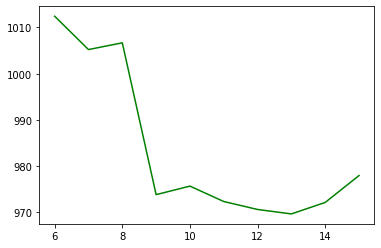

13

In [11]:
show_perplexity(review_cv, start=6, end=15)

In [12]:
lda = LatentDirichletAllocation(n_components=13, max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', n_jobs=-1, random_state=0)
review_topics = lda.fit_transform(review_cv)
review_topics.shape

(3219, 13)

In [14]:
print_top_words(lda, cv.get_feature_names_out(), 15)

Topic #0: com, clipper, access, government, phone, chip, netcom, just, article, right, pat, digex, ti, wa, good
Topic #1: university, point, posting, thanks, nntp, host, problem, help, monitor, looking, i'm, know, just, graphic, cc
Topic #2: nasa, gov, year, research, cost, center, station, space, program, university, wa, billion, money, technology, news
Topic #3: key, encryption, chip, use, public, security, privacy, law, information, clipper, message, bit, ha, government, number
Topic #4: scsi, card, bus, ide, bit, driver, mode, memory, drive, pc, speed, controller, video, o, 16
Topic #5: ca, com, posting, nntp, host, version, know, newsreader, tin, ha, i'm, wrote, university, need, robert
Topic #6: com, article, c, au, sandvik, ibm, apple, kent, net, university, wa, posting, newton, cc, i'm
Topic #7: drive, db, disk, hard, ___, port, floppy, modem, __, work, com, controller, bios, card, problem
Topic #8: article, uk, ac, posting, nntp, host, wa, university, like, just, henry, toront